In [1]:
import cv2
import pandas as pd 
import numpy as np
from google.colab.patches import cv2_imshow
import math
import copy
from matplotlib import pyplot as plt
import sys

In [2]:
img =  cv2.imread("/content/CinqueTerre.jpg")

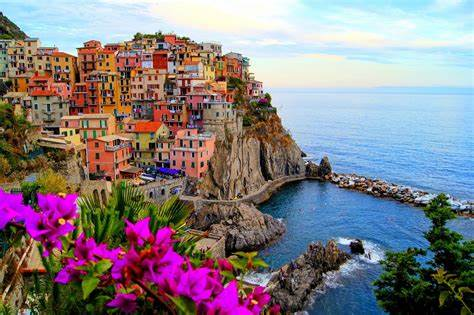

In [3]:
cv2_imshow(img)

In [4]:
print(img.shape)

(315, 474, 3)


In [5]:
windows = img.shape[2]
height = img.shape[0]
width = img.shape[1]

In [6]:
subimg1 = img[0:50 , 0:50]
subimg2 = img[-50:: , -50::]

In [7]:
subimg1.shape

(50, 50, 3)

In [8]:
subimg2.shape

(50, 50, 3)

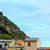

In [9]:
cv2_imshow(subimg1)

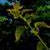

In [10]:
cv2_imshow(subimg2)

In [11]:
SSD = np.sum((subimg1-subimg2)**2)

In [12]:
SSD

781484

In [13]:
img2 = cv2.imread('monastery.jpg')

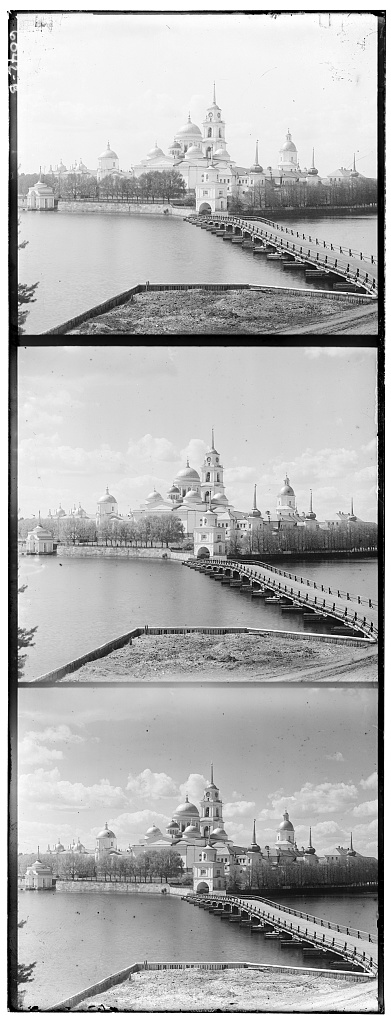

In [14]:
cv2_imshow(img2)

In [15]:
img2 = cv2.cvtColor(img2,cv2.COLOR_BGR2GRAY)

In [16]:
img2.shape

(1024, 391)

In [17]:
height, width = img2.shape
window_height = math.floor(height/3)
window_width = width

In [18]:
r = img2[: window_height,:]
g = img2[window_height: 2*window_height,:]
b = img2[2*window_height:3*window_height, :]

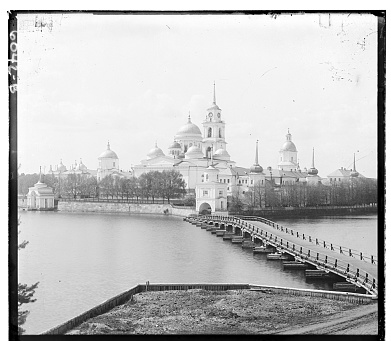

In [19]:
cv2_imshow(r)

In [20]:
crop_border_factor = 0.05

height_crop = int(np.round(crop_border_factor*window_height))
width_crop = int(np.round(crop_border_factor*window_width))

In [21]:

blue_window = b[height_crop: -height_crop, width_crop: -width_crop]
green_window = g[height_crop: -height_crop, width_crop: -width_crop]
red_window = r[height_crop: -height_crop, width_crop: -width_crop]


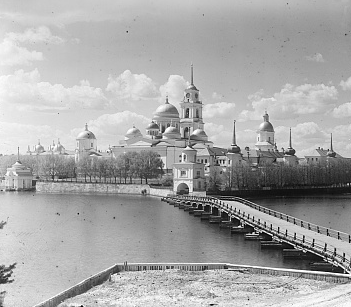

In [22]:
cv2_imshow(blue_window)

In [23]:
window_height, window_width = blue_window.shape

best_red_window = copy.deepcopy(red_window)
best_red_ssd = sys.maxsize


In [24]:
for x in range(0, 10):
    for y in range(0, 10):
        
        r_window = np.zeros((window_height, window_width))
        r_window[:window_height -x, :window_width-y] = red_window[x:,y:]
        ssd = np.sum(np.square((blue_window[:window_height -x, :window_width-y] - r_window[:window_height -x, :window_width-y])))
        
        if(ssd<= best_red_ssd):
            best_red_window = r_window
            best_red_ssd = ssd

In [25]:
best_green_window = green_window
best_green_ssd = sys.maxsize

In [26]:
for x in range(1, 10):
    for y in range(1, 10):
        
        g_window = np.zeros((window_height, window_width))
        g_window[:window_height -x, :window_width-y] = green_window[x:,y:]
        ssd = np.sum(np.square((blue_window[:window_height -x, :window_width-y] - g_window[:window_height -x, :window_width-y])))
        
        if(ssd<= best_green_ssd):
            best_green_window = g_window
            best_green_ssd = ssd

In [27]:
best_green_window= np.rint(best_green_window)
best_red_window = np.rint(best_red_window)

In [28]:
out_img = np.zeros((window_height, window_width,3))

In [29]:
out_img[:,:,2] = best_red_window/255
out_img[:,:,0] = blue_window/255
out_img[:,:,1] = best_green_window/255

In [30]:
out_img.shape

(307, 351, 3)

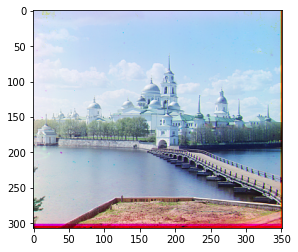

In [31]:
plt.imshow(out_img)
cv2.waitKey(0)
plt.show()